Let's explain what we mean by local mode via SALT via an example:

$$
y'=ay,y(0)=1,a=1
$$ 
This has solution $y(t)=e^{at}$ with $a=1$. In this example we're interested in the effect of small changes of $a$ for the solution at $t=1$. (this is similar to calculating greeks) <br>

The information of small changes of $a$ is available in unbiased estimations of the solution with small changes in $a$. To capture this information we use those unbiased estimates to fit a function using SALT with Legendre polynomials.    


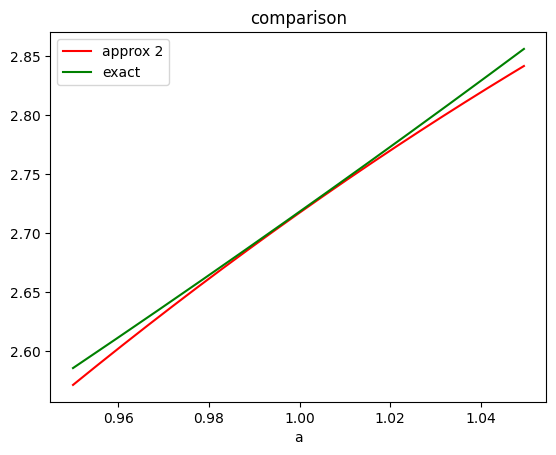

-0.0003094916027585334


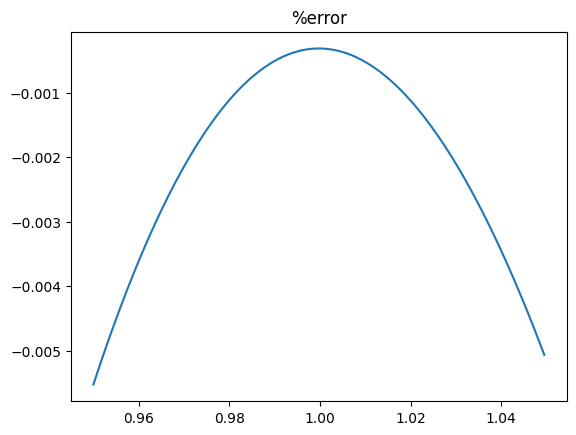

In [291]:
from random import random
import matplotlib.pyplot as plt
import numpy as np
from math import exp

#legendre polynomials
def p(x,n):
    if n == 0:
        return 1
    pl,pll = x,1
    for j in range(n-1):
        pl,pll = ((2*j+1)*x*pl-j*pll )/(j+1),pl
    return pl

# can be more efficient using Clenshaw algorithm (https://en.wikipedia.org/wiki/Clenshaw_algorithm)
def approx_sol(a_control,x):
    return sum(a_control[j]*p(x,j)for j in range(len(a_control)))

def scale_down(x): # from [-1,1] to [0.9,1.1]
    return x/20+1

def scale_up(x): # from [0.9,1.1] to [-1,1]
    return 20*(x-1)

#estimator for y(t,a)
def Ya(t,a):
    return (1+a*Ya(random()*t,a) if random()<t else 1) if t<1 else 1+t*a*Ya(random()*t,a)
    
def a_all(a_control,nsim=10):
    sol = [0]*len(a_control)
    for _ in range(nsim):
        u = (random()*2-1)
        ps = [p(u,j) for j in range(len(a_control))]
        aasol = sum(a*p for a,p in zip(a_control,ps)) 
        ff = Ya(1,scale_down(u)) 
        for n in range(len(a_control)):
            sol[n] += ((2*n+1)*(ff-aasol)*ps[n] + a_control[n])/nsim 
    return sol

a_control = [0]
order = 2

#we gradually add more and more coefficient you can think of it as somekind of regularization
while len(a_control)<order+2:
    a_control = a_all(a_control,10**5) 
    a_control.append(0)

def sol(x):
    return exp(x)
xs = np.arange(-1,1,0.01)
zs = [approx_sol(a_control,x) for x in xs]
xs = [scale_down(x) for x in xs]
ys = [sol(x) for x in xs ]
plt.plot(xs,zs, color= "red", label=f"approx {order}")
plt.plot(xs,ys, color= "green",label="exact")
plt.legend()
plt.xlabel("a")
plt.title("comparison")
plt.show()

xs = np.arange(-1,1,0.01)
print((approx_sol(a_control,0)-sol(scale_down(0)))/sol(scale_down(0)))
zs = [(approx_sol(a_control,x)-sol(scale_down(x)))/sol(scale_down(x)) for x in xs]
xs = [scale_down(x) for x in xs]
plt.plot(xs,zs)
plt.title("%error")
plt.show()
